In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        continue
print("Data Loaded")
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Data Loaded


In [3]:
import cv2
import os
import pandas as pd
import numpy as np
from random import shuffle
from tqdm import tqdm
import scipy
import skimage
from skimage.transform import resize
from PIL import Image
import sklearn

ModuleNotFoundError: No module named 'cv2'

In [5]:
import tensorflow as tf
import keras
from PIL import Image
from IPython.display import display
from keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout
from keras.models import Sequential
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [6]:
print(os.listdir("/kaggle/input/papsmeardatasets/"))

['herlev_pap_smear', 'sipakmed_wsi_pap_smear', 'sipakmed_fci_pap_smear']


In [7]:
herlev= "/kaggle/input/papsmeardatasets/herlev_pap_smear/"
sipakmed= "/kaggle/input/papsmeardatasets/sipakmed_fci_pap_smear/"

In [8]:
os.listdir(herlev)

['normal_intermediate',
 'abnormal_moderate_dysplastic',
 'abnormal_severe_dysplastic',
 'abnormal_carcinoma_in_situ',
 'normal_columnar',
 'normal_superficiel',
 'abnormal_light_dysplastic']

In [9]:
os.listdir(sipakmed)

['normal_Parabasal',
 'benign_Metaplastic',
 'abnormal_Dyskeratotic',
 'normal_Superficial_Intermediate',
 'abnormal_Koilocytotic']

In [10]:
data_one= os.listdir(herlev)
data_two= os.listdir(sipakmed)

In [11]:
def get_label(data):
    for next_dir in os.listdir(data):
        if next_dir.startswith('normal') or next_dir.startswith('benign'):
            label= str(directory)
        elif next_dir.startswith('abnormal'):
            label= str(directory)
            
    return next_dir, label

In [12]:
def get_data(Dir):
    X = []
    y = []
    
    for dir_name in Dir:
        for nextDir in os.listdir(dir_name):
            if not nextDir.startswith('.'):
                if nextDir.startswith('normal'):
                    label = str(nextDir)
                elif nextDir.startswith('abnormal') or nextDir.startswith('benign'):
                    label = str(nextDir)

                temp = dir_name + nextDir

                for file in tqdm(os.listdir(temp)):
                    if not file.endswith('d.bmp') and not file.endswith('dat'):
                        img = cv2.imread(temp + '/' + file)
                        if img is not None:
                            img = skimage.transform.resize(img, (64,64,3))
                            #img_file = scipy.misc.imresize(arr=img_file, size=(150, 150, 3))
                            img = np.asarray(img)
                            X.append(img)
                            y.append(label)
                    
    X = np.asarray(X)
    return X,y

In [13]:
data= [herlev, sipakmed]

In [14]:
X, y= get_data(data)

100%|██████████| 2475/2475 [00:08<00:00, 300.27it/s]


In [15]:
from collections import Counter
y_counter= Counter(y)
print (y_counter)

Counter({'normal_Superficial_Intermediate': 831, 'abnormal_Koilocytotic': 825, 'abnormal_Dyskeratotic': 813, 'benign_Metaplastic': 793, 'normal_Parabasal': 787, 'abnormal_severe_dysplastic': 197, 'abnormal_light_dysplastic': 182, 'abnormal_carcinoma_in_situ': 150, 'abnormal_moderate_dysplastic': 146, 'normal_columnar': 98, 'normal_superficiel': 74, 'normal_intermediate': 70})


In [16]:
y_mapping= {'normal_Superficial_Intermediate': 0,
            'abnormal_Koilocytotic': 1,
            'abnormal_Dyskeratotic': 2,
            'benign_Metaplastic': 3,
            'normal_Parabasal': 4,
            'abnormal_severe_dysplastic': 5,
            'abnormal_light_dysplastic': 6,
            'abnormal_carcinoma_in_situ': 7,
            'abnormal_moderate_dysplastic': 8,
            'normal_columnar': 9, 
            'normal_superficiel': 10,
            'normal_intermediate': 11}

y_df = pd.DataFrame (y, columns = ['y'])

In [17]:
y_df

,y
0,normal_intermediate
1,normal_intermediate
2,normal_intermediate
3,normal_intermediate
4,normal_intermediate
...,...
4961,abnormal_Koilocytotic
4962,abnormal_Koilocytotic
4963,abnormal_Koilocytotic
4964,abnormal_Koilocytotic


In [18]:
y_df['y'] = y_df['y'].replace(y_mapping)

In [19]:
y_df['y']

0       11
1       11
2       11
3       11
4       11
        ..
4961     1
4962     1
4963     1
4964     1
4965     1
Name: y, Length: 4966, dtype: int64

In [20]:
X = X.astype('float32')

In [21]:
y= y_df['y']

In [22]:
train_x, val_x, train_y, val_y= train_test_split(X, y, test_size= 0.2)

In [23]:
train_y= tf.keras.utils.to_categorical(train_y, 12)
val_y= tf.keras.utils.to_categorical(val_y, 12)

2022-05-11 09:43:25.668743: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0

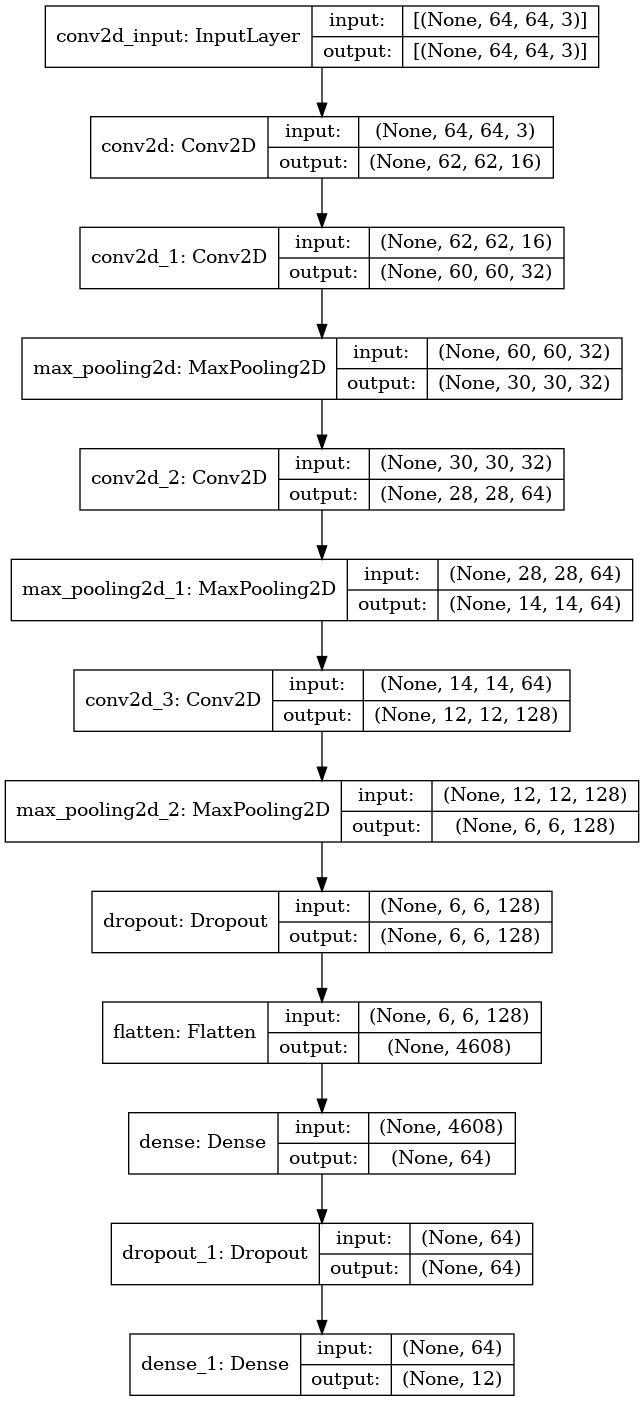

In [24]:
# CNN Model 

model = Sequential() 
# Convolutional Layer with input shape (64,64,3)
model.add(Conv2D(filters=16, kernel_size= (3,3), activation= 'relu', input_shape=(64,64,3)) )

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=12, activation='softmax'))

#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']  )
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics =["accuracy",keras.metrics.Recall(
    thresholds=None, top_k=None, class_id=None, name=None, dtype=None
)])
model.summary()
plot_model(model, to_file='saratani_model.png', show_shapes=True, show_layer_names=True)
display(Image.open('saratani_model.png'))

In [25]:
# Adding Model check point Callback
mc = ModelCheckpoint(filepath="saratani_best_model.hdf5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto');
call_back = [ mc ]

In [26]:
history= model.fit(train_x, train_y,
                   epochs= 32,batch_size= 32, verbose= 2,
                   validation_data= (val_x, val_y), callbacks= call_back)

2022-05-11 09:43:28.095940: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/32
125/125 - 17s - loss: 1.8063 - accuracy: 0.3640 - recall: 0.1236 - val_loss: 1.6099 - val_accuracy: 0.5030 - val_recall: 0.1449

Epoch 00001: val_accuracy improved from -inf to 0.50302, saving model to saratani_best_model.hdf5
Epoch 2/32
125/125 - 14s - loss: 1.5481 - accuracy: 0.4927 - recall: 0.2480 - val_loss: 1.4043 - val_accuracy: 0.5694 - val_recall: 0.3179

Epoch 00002: val_accuracy improved from 0.50302 to 0.56942, saving model to saratani_best_model.hdf5
Epoch 3/32
125/125 - 13s - loss: 1.3668 - accuracy: 0.5677 - recall: 0.3708 - val_loss: 1.1970 - val_accuracy: 0.6328 - val_recall: 0.3883

Epoch 00003: val_accuracy improved from 0.56942 to 0.63280, saving model to saratani_best_model.hdf5
Epoch 4/32
125/125 - 14s - loss: 1.2676 - accuracy: 0.5937 - recall: 0.4230 - val_loss: 1.1638 - val_accuracy: 0.5895 - val_recall: 0.4879

Epoch 00004: val_accuracy did not improve from 0.63280
Epoch 5/32
125/125 - 13s - loss: 1.1275 - accuracy: 0.6234 - recall: 0.4919 - val_los

In [27]:
print(model.history.history.keys())

dict_keys(['loss', 'accuracy', 'recall', 'val_loss', 'val_accuracy', 'val_recall'])


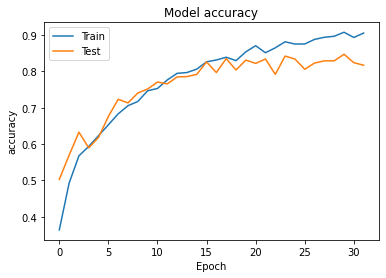

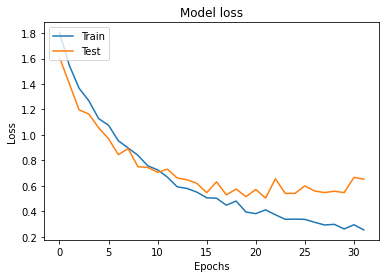

In [28]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation loss values
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()                                                       

In [29]:
model.save('saratani_predictive_model.h5')